# DS322 - Machine Learning 
### Instructor:  Mr. Matthew R. Maulion, MSc

#### Names of Group 3 Members: 
- Cagas, Nephea 
- Galinato, Jan Carlo
- Opalla, Erica
- Velono, Hannah
- Viudor, Janrey

#### Section: DS3A

# Milk Quality Prediction
Dataset Link: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

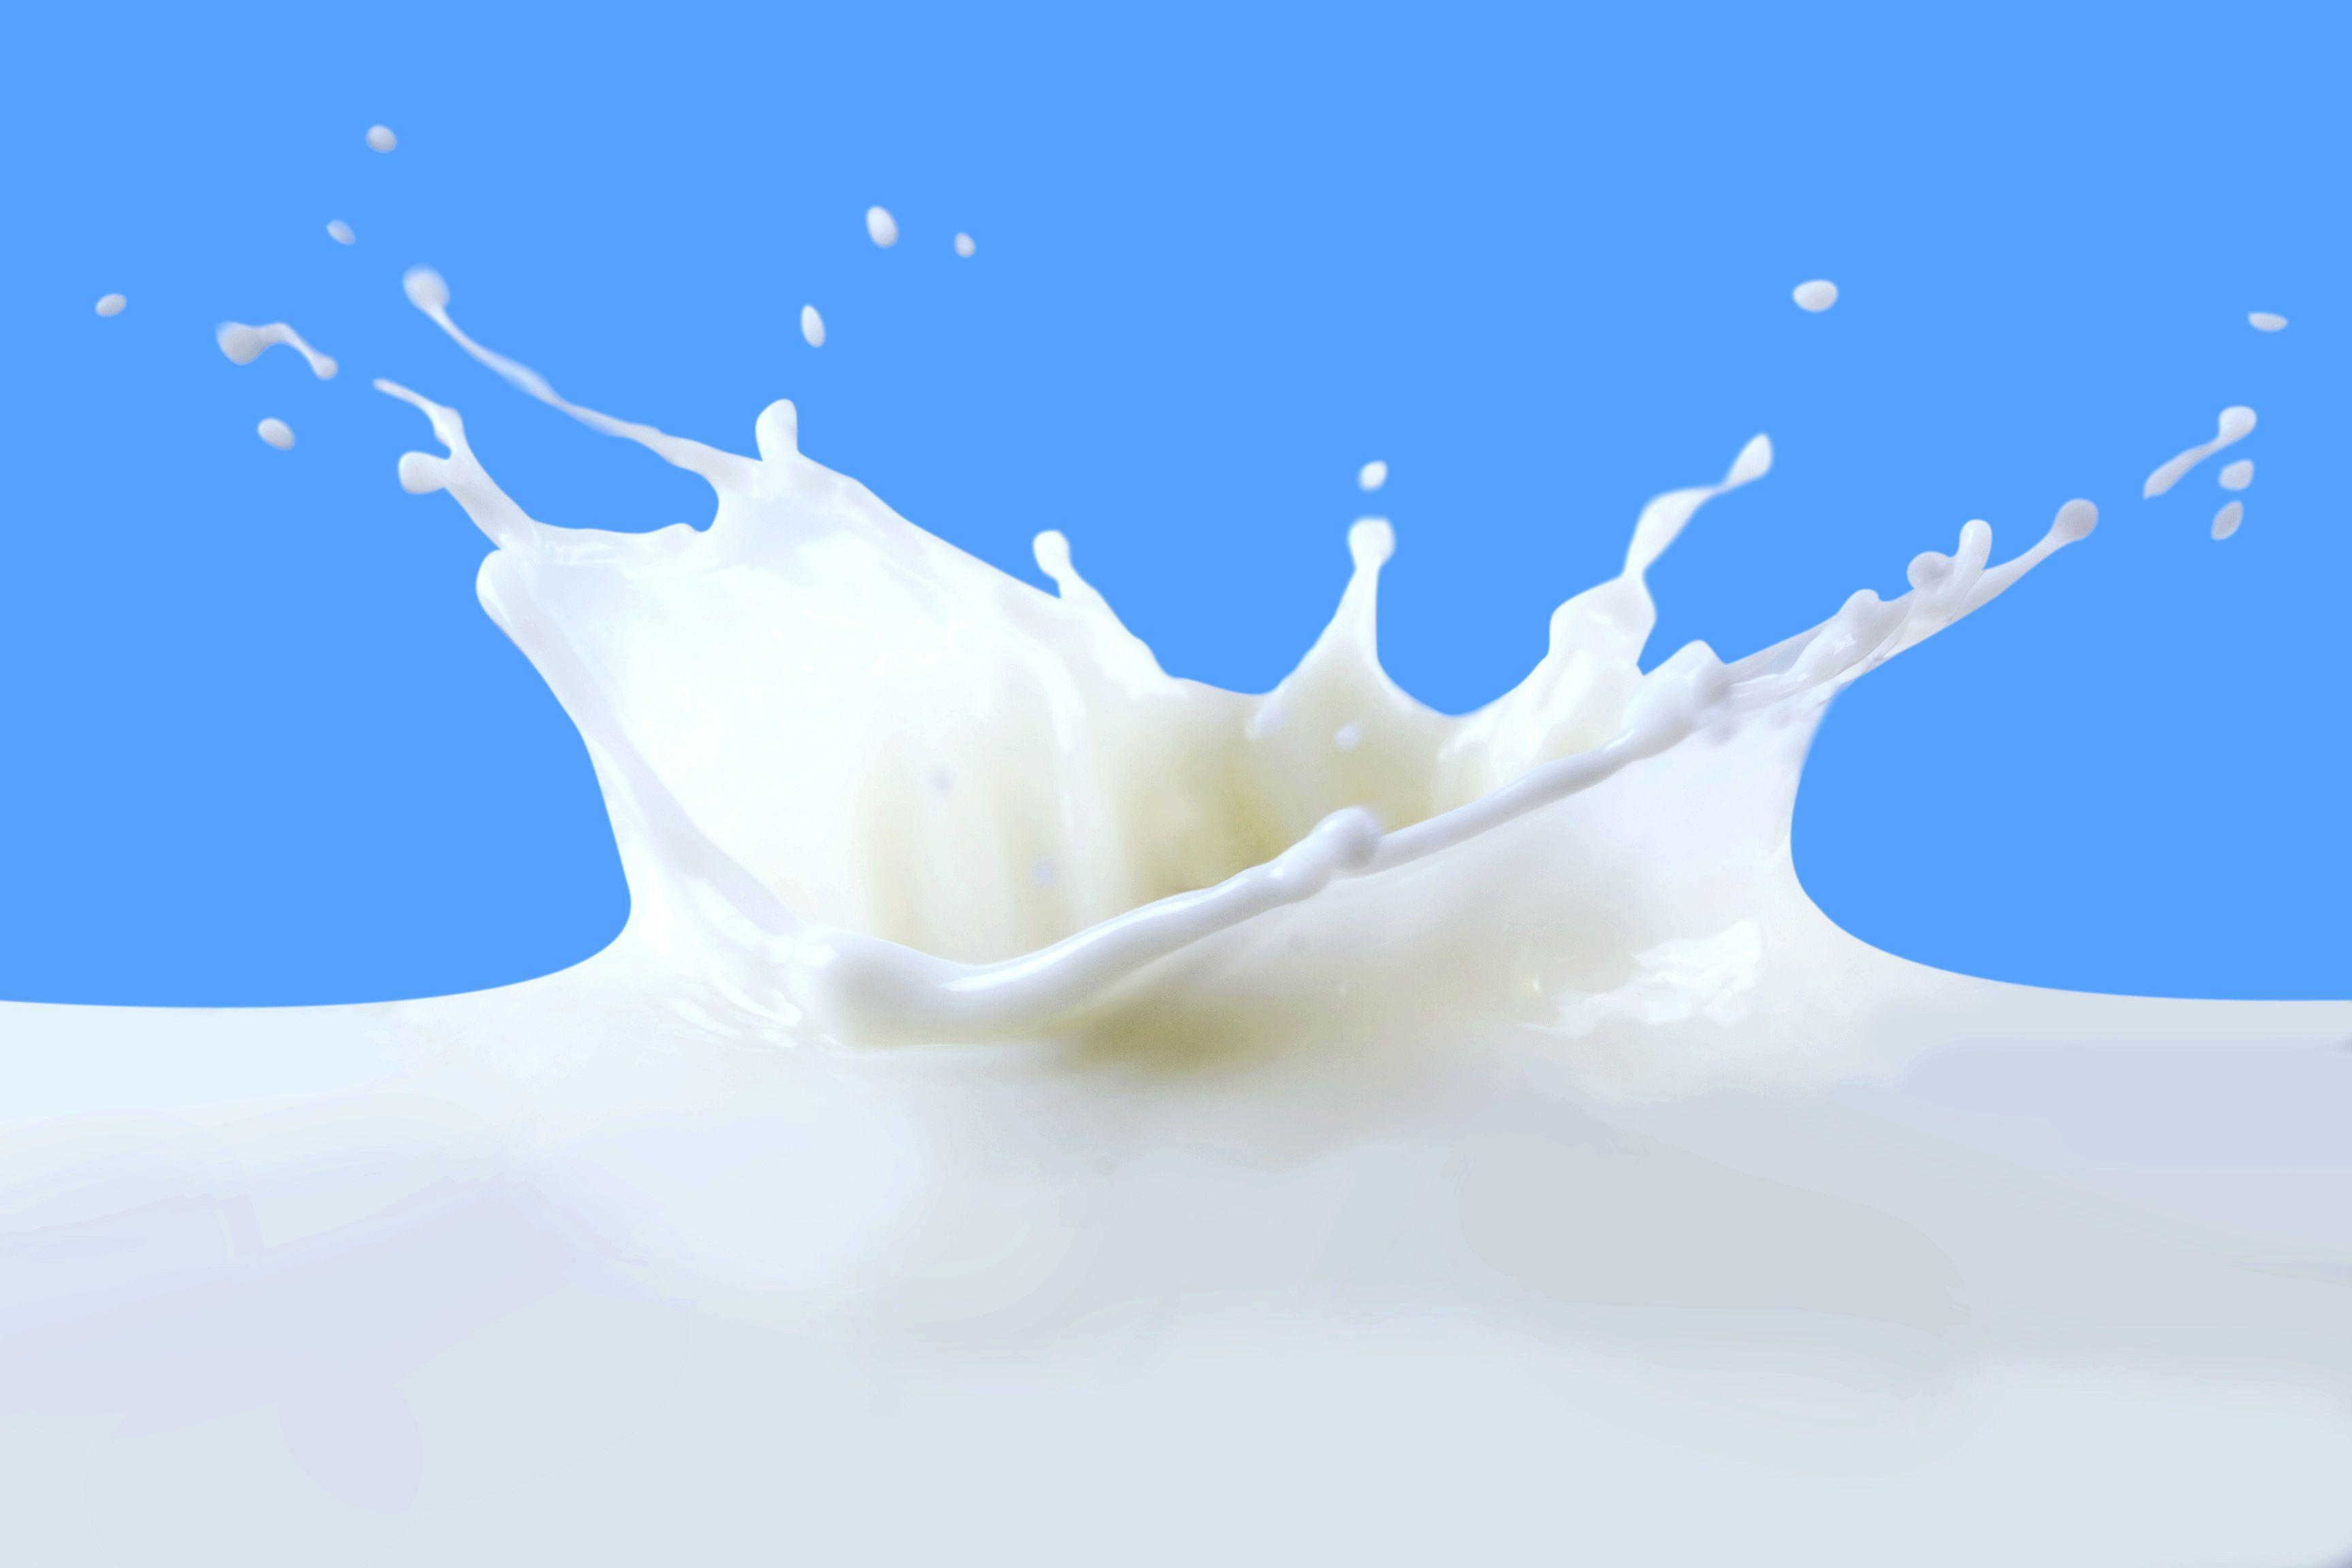

This dataset provides essential information for predicting the quality of milk. It encompasses seven independent variables: pH, Temperature, Taste, Odor, Fat, Turbidity, and Color. These variables offer valuable insights into the factors influencing milk quality.

The quality of milk, denoted by its Grade, is classified into three categories: Low (Bad), Medium (Moderate), and High (Good). This classification relies on several parameters such as Taste, Odor, Fat, and Turbidity. Optimal conditions for these parameters are represented by a value of 1, whereas suboptimal conditions are denoted by 0.

Here's a breakdown of each independent variable:

**pH**: Represents the pH level of the milk, ranging from 3 to 9.5.

**Temperature:** Indicates the temperature of the milk, with values ranging from 34°C to 90°C.

**Taste:** Defines the taste of the milk, with possible values of 1 (good) or 0 (bad).

**Odor:** Represents the odor of the milk, with possible values of 1 (good) or 0 (bad).

**Fat:** Indicates the fat content of the milk, with possible values of 1 (higher level of fat content) or 0 (lower level of fat content).

**Turbidity:** Describes the turbidity of the milk, with possible values of 1 (clearer) or 0 (cloudiness).

**Color:** Represents the color of the milk, ranging from 240 to 255.

**Grade:** This is the target variable, indicating the quality of the milk as low_quality, medium_quality, or high_quality.

##  Problem

A change in the odor, taste, or appearance of milk could reflect a health issue, problems with milking equipment, sanitation and nutrition. When it comes to monitoring milk quality, one of the easiest, least expensive ways to detect a milk quality issue is to rely on our senses for gustatory (taste), olfactory (smell), or visual clues if milk is different from normal, but senses alone doesn't determine the quality of milk.  The quality milk problem indicator is pH, Temperature, Taste, Odor, Fat, turbidity and color. This is what we will use to determine  the grade or quality of milk which can be Low(Bad), Medium (Moderate) or High(Good).

1. Health and Safety - The primary concern is ensuring that the milk is safe for consumption. Quality milk should be free from harmful bacteria, contaminants, antibiotics, and other substances that could pose health risks to consumers. Regular  testing and monitoring of milk quality  is essential to maintain safety standards. 


2. Consumer Confidence - Consumers expect high quality milk that is fresh, pure and nutritious. If the milk consistently meets these expectations, it's builds trust and loyalty among customers. Conversely, any Decline  in quality could lead to a loss of confidence  and decline in sales. 

Ensuring milk quality involves proper hygiene practices during production, processing, and distribution, as well as regular monitoring and enforcement of quality standards.


##  Data Discussion

In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('milknew.csv')
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [3]:
df.shape

(1059, 8)

There are 1069 rows and 8 columns (•‿•)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


No null values. pH is in float64, Grade is an object, and the rest of the columns are in int64 dtype.

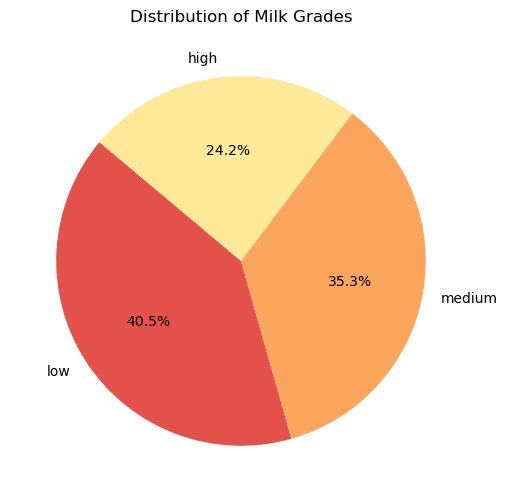

low       429
medium    374
high      256
Name: Grade, dtype: int64


In [5]:
plt.figure(figsize=(8, 6))
grade_counts = df['Grade'].value_counts()
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Spectral'))
plt.title('Distribution of Milk Grades')
plt.show()

print(df['Grade'].value_counts())

The dataset contains 429 instances of low-quality milk, accounting for 40.5% of the total, 374 instances of medium-quality milk, representing 35.3%, and 256 instances of high-quality milk, making up 24.2%.

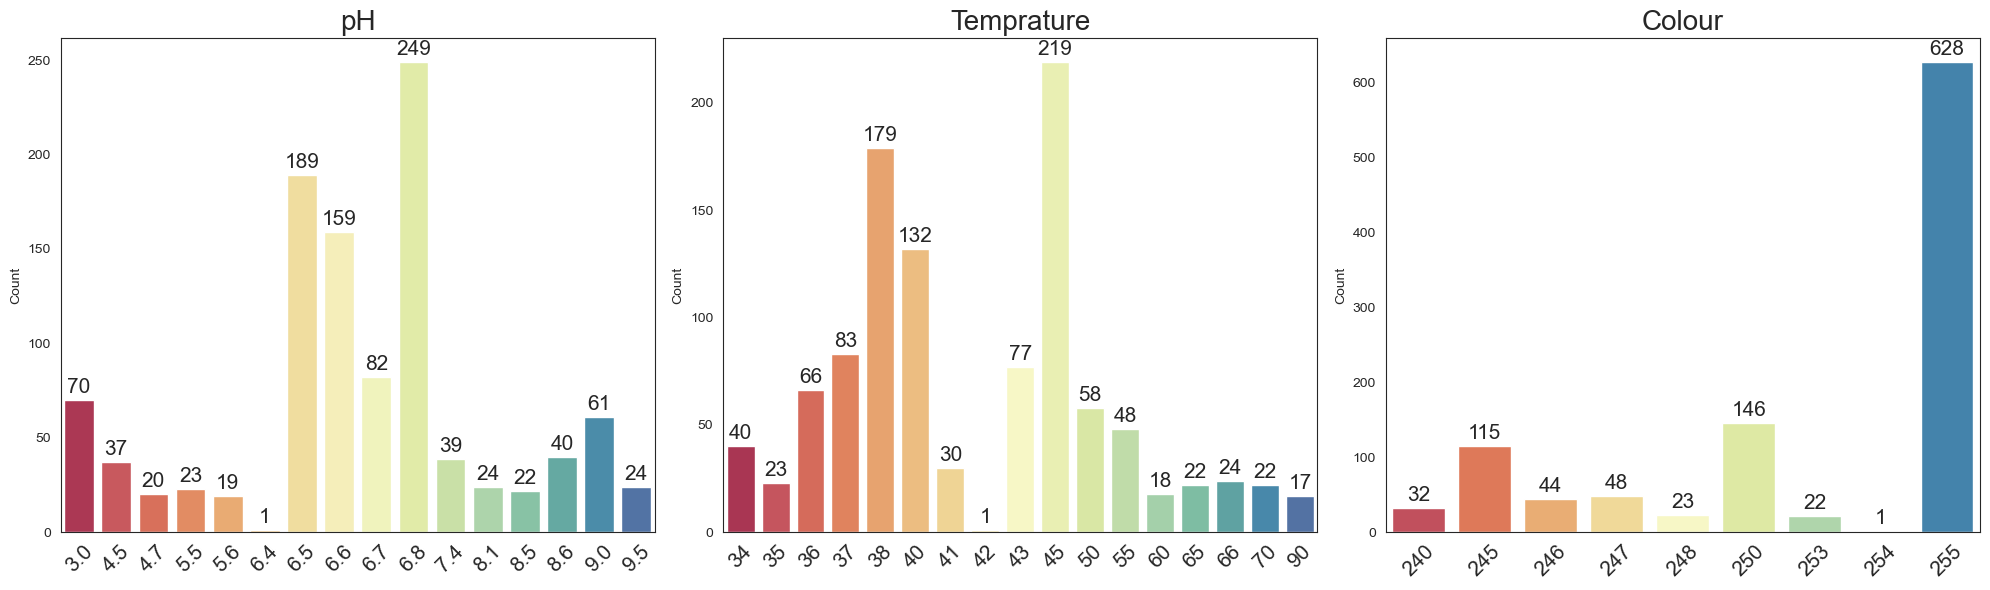

In [6]:
#plotting continuous features
colplot = ['pH', 'Temprature', 'Colour']

sns.set_style("white")

fig, axes = plt.subplots(nrows=1, ncols=len(colplot), figsize=(20, 6), dpi=100)

for i, col in enumerate(colplot):
    sns.countplot(x=col, data=df, palette="Spectral", ax=axes[i])
    axes[i].set_title(col, fontsize=20)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(None) 

   
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 9), 
                         textcoords='offset points',
                         fontsize=15)

    axes[i].tick_params(axis='x', rotation=45, labelsize=15)

plt.tight_layout()
plt.show()

**Observations**
- The normal pH range of fresh milk falls between 6.4 and 6.8. The majority of milk samples in the dataset exhibit pH levels within this range, indicative of freshness.
 - A significant proportion of the milk was produced at 45 degrees Celsius, followed by 38 degrees Celsius.
 - The majority of the milk was produced with a color value of 255. A color value of 255 typically indicates a very white or pure appearance.

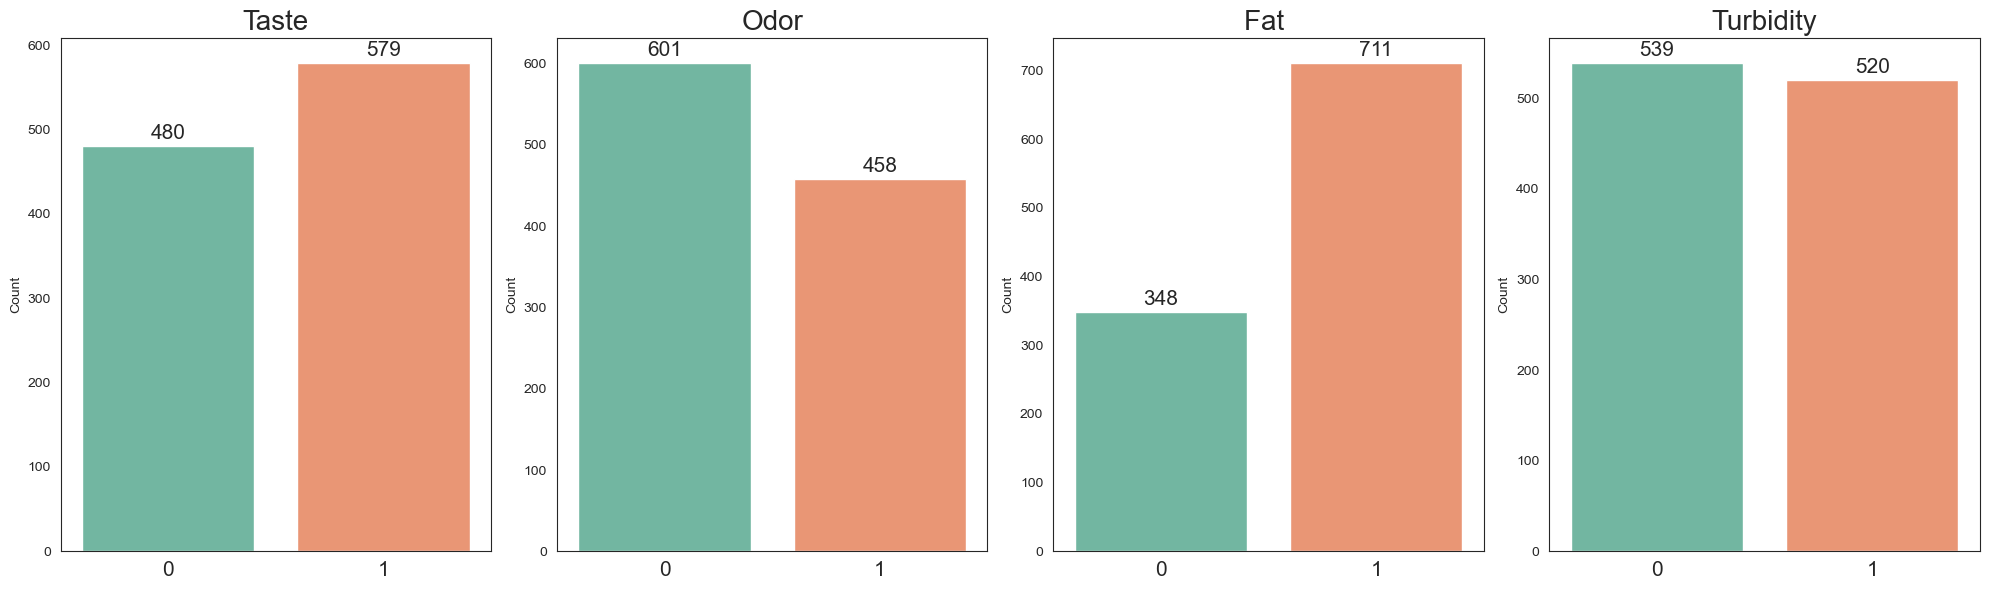

In [7]:
#plotting binary feautures
plot_col = ['Taste', 'Odor', 'Fat ', 'Turbidity']

sns.set_style("white")

fig, axes = plt.subplots(nrows=1, ncols=len(plot_col), figsize=(20, 6), dpi=100)

for i, col in enumerate(plot_col):
    sns.countplot(x=col, data=df, palette="Set2", ax=axes[i])
    axes[i].set_title(col, fontsize=20)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(None)  
    
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 9), 
                         textcoords='offset points',
                         fontsize=15)

    axes[i].tick_params(axis='x', labelsize=15)

plt.tight_layout()
plt.show()

**Observations:**
 - The majority of the taste is considered good.
 - A majority having a bad odor and there are 429 instances of low-quality milk. It seems that even though the odor is poor, it is still classified as medium or high quality. 
 - A majority of the milk samples have a higher level of fat content.
 - The distribution of turbidity is nearly equal, with 0 (indicating cloudiness) being slightly more prevalent.

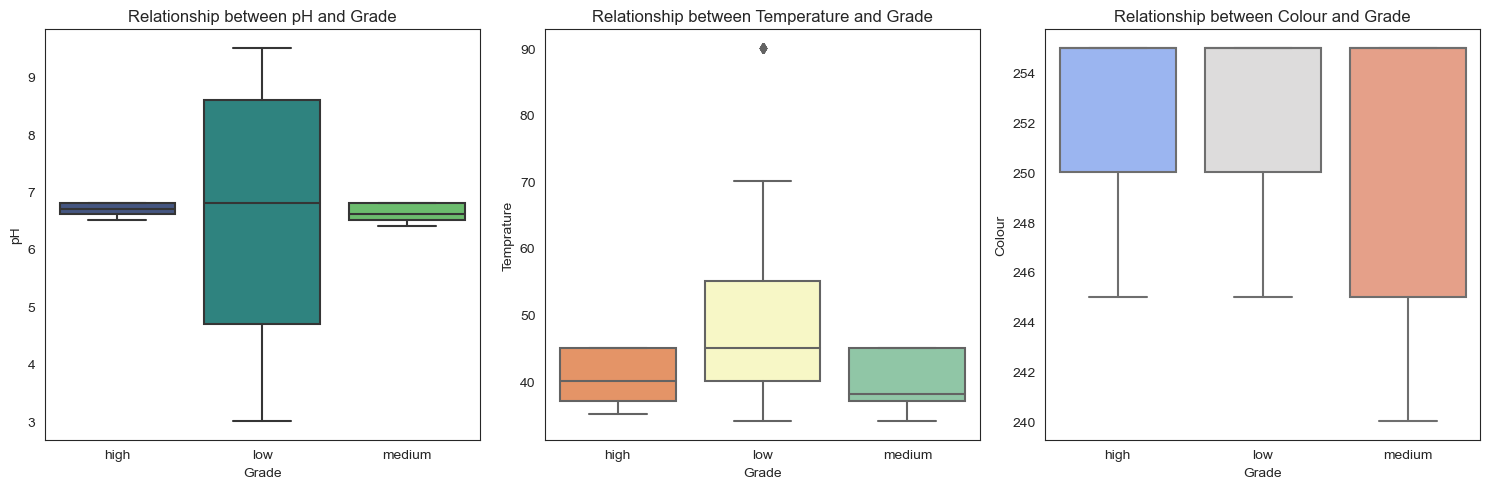

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Boxplot for 'pH' and 'Grade'
sns.boxplot(x='Grade', y='pH', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Relationship between pH and Grade')

# Boxplot for 'Temperature' and 'Grade'
sns.boxplot(x='Grade', y='Temprature', data=df, ax=axes[1], palette='Spectral')
axes[1].set_title('Relationship between Temperature and Grade')

# Boxplot for 'Colour' and 'Grade'
sns.boxplot(x='Grade', y='Colour', data=df, ax=axes[2], palette='coolwarm')
axes[2].set_title('Relationship between Colour and Grade')

plt.tight_layout()
plt.show()

**Observations:**

- **pH:**
The middle pH level for low-quality milk is 6.8, while for medium-quality milk it's 6.6, and for high-quality milk, it's 6.7. This means medium-quality milk tends to have a slightly lower pH compared to the other grades.

 - **Temperature:**
The temperature used to produce low-quality milk is typically higher, around 45°C, compared to medium-quality milk at 38°C and high-quality milk at 40°C. This suggests that extreme temperatures might impact milk quality, with lower temperatures preferred for better quality.

 - **Colour:**
Most milk, regardless of quality, appears visually similar (color 255). However, medium-quality milk may show slightly more color variation, with a lower quartile of 245, compared to low and high-quality milk, which have a lower quartile of 250

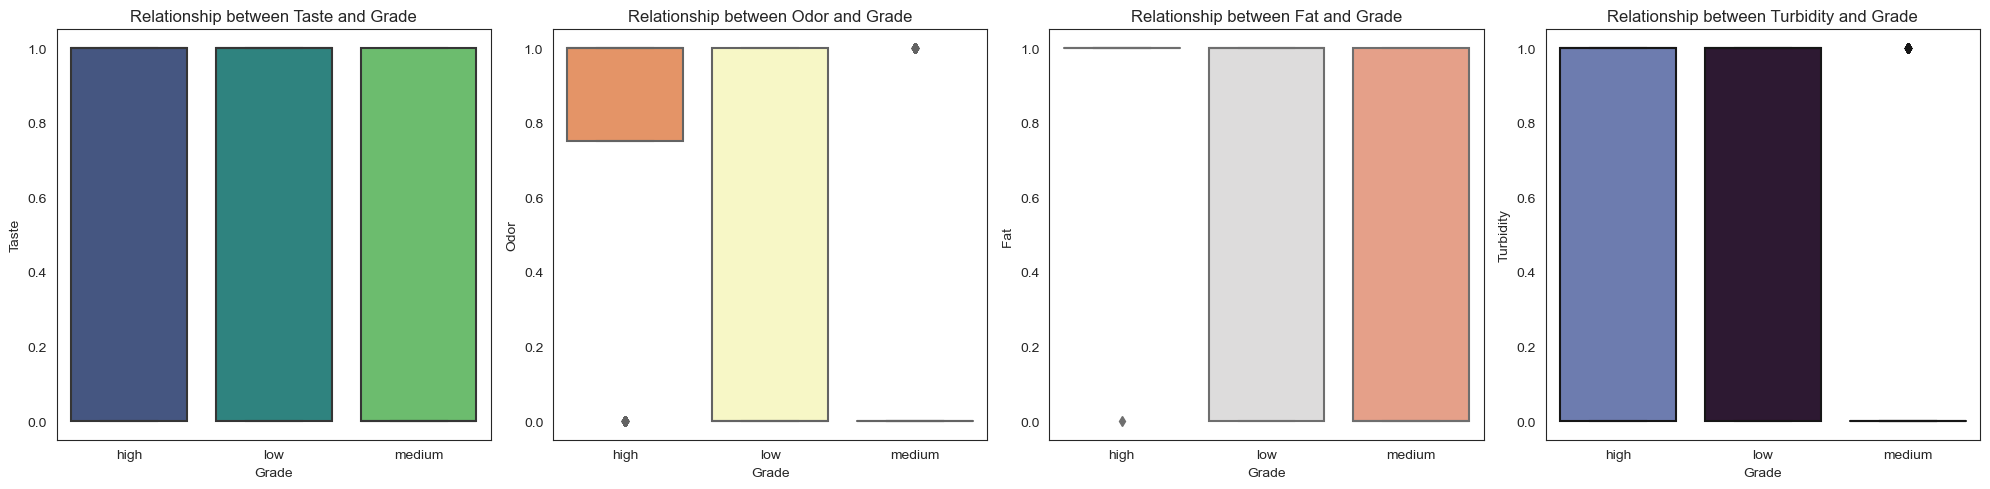

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Boxplot for 'Taste' and 'Grade'
sns.boxplot(x='Grade', y='Taste', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Relationship between Taste and Grade')

# Boxplot for 'Odor' and 'Grade'
sns.boxplot(x='Grade', y='Odor', data=df, ax=axes[1], palette='Spectral')
axes[1].set_title('Relationship between Odor and Grade')

# Boxplot for 'Fat' and 'Grade'
sns.boxplot(x='Grade', y='Fat ', data=df, ax=axes[2], palette='coolwarm')
axes[2].set_title('Relationship between Fat and Grade')

# Boxplot for 'Turbidity' and 'Grade'
sns.boxplot(x='Grade', y='Turbidity', data=df, ax=axes[3], palette='twilight')
axes[3].set_title('Relationship between Turbidity and Grade')

plt.tight_layout()
plt.show()

**Observations:**
 - **Taste:**
Most milk, regardless of grade, tends to have either good or bad taste, with a similar distribution across different quality grades. So, taste alone may not be the best indicator of quality.

 - **Odor:**
High-quality milk generally has a consistent good odor, while low and medium-quality milk may vary in odor, with some having no odor at all.

 - **Fat:**
High-quality milk typically has a higher fat content compared to medium and low-quality milk, which may vary in fat content.So, if you prefer creamier milk, opt for higher fat content.

 - **Turbidity:**
The clarity of milk varies across different grades, with some milk being clearer (low turbidity) and others being cloudier (high turbidity).

**In summary:**

 - Choose milk with a consistent good smell for higher quality.
 - Higher fat content may indicate creamier milk.
 - Clearer milk often means better quality.
 - Aim for consistent pH and temperature levels during production.
    - The middle pH level for High quality milk is 6.7
    - The temperature used to produce high-quality milk is around 40°C.
 - Not crucial but some color variation might be worth considering.

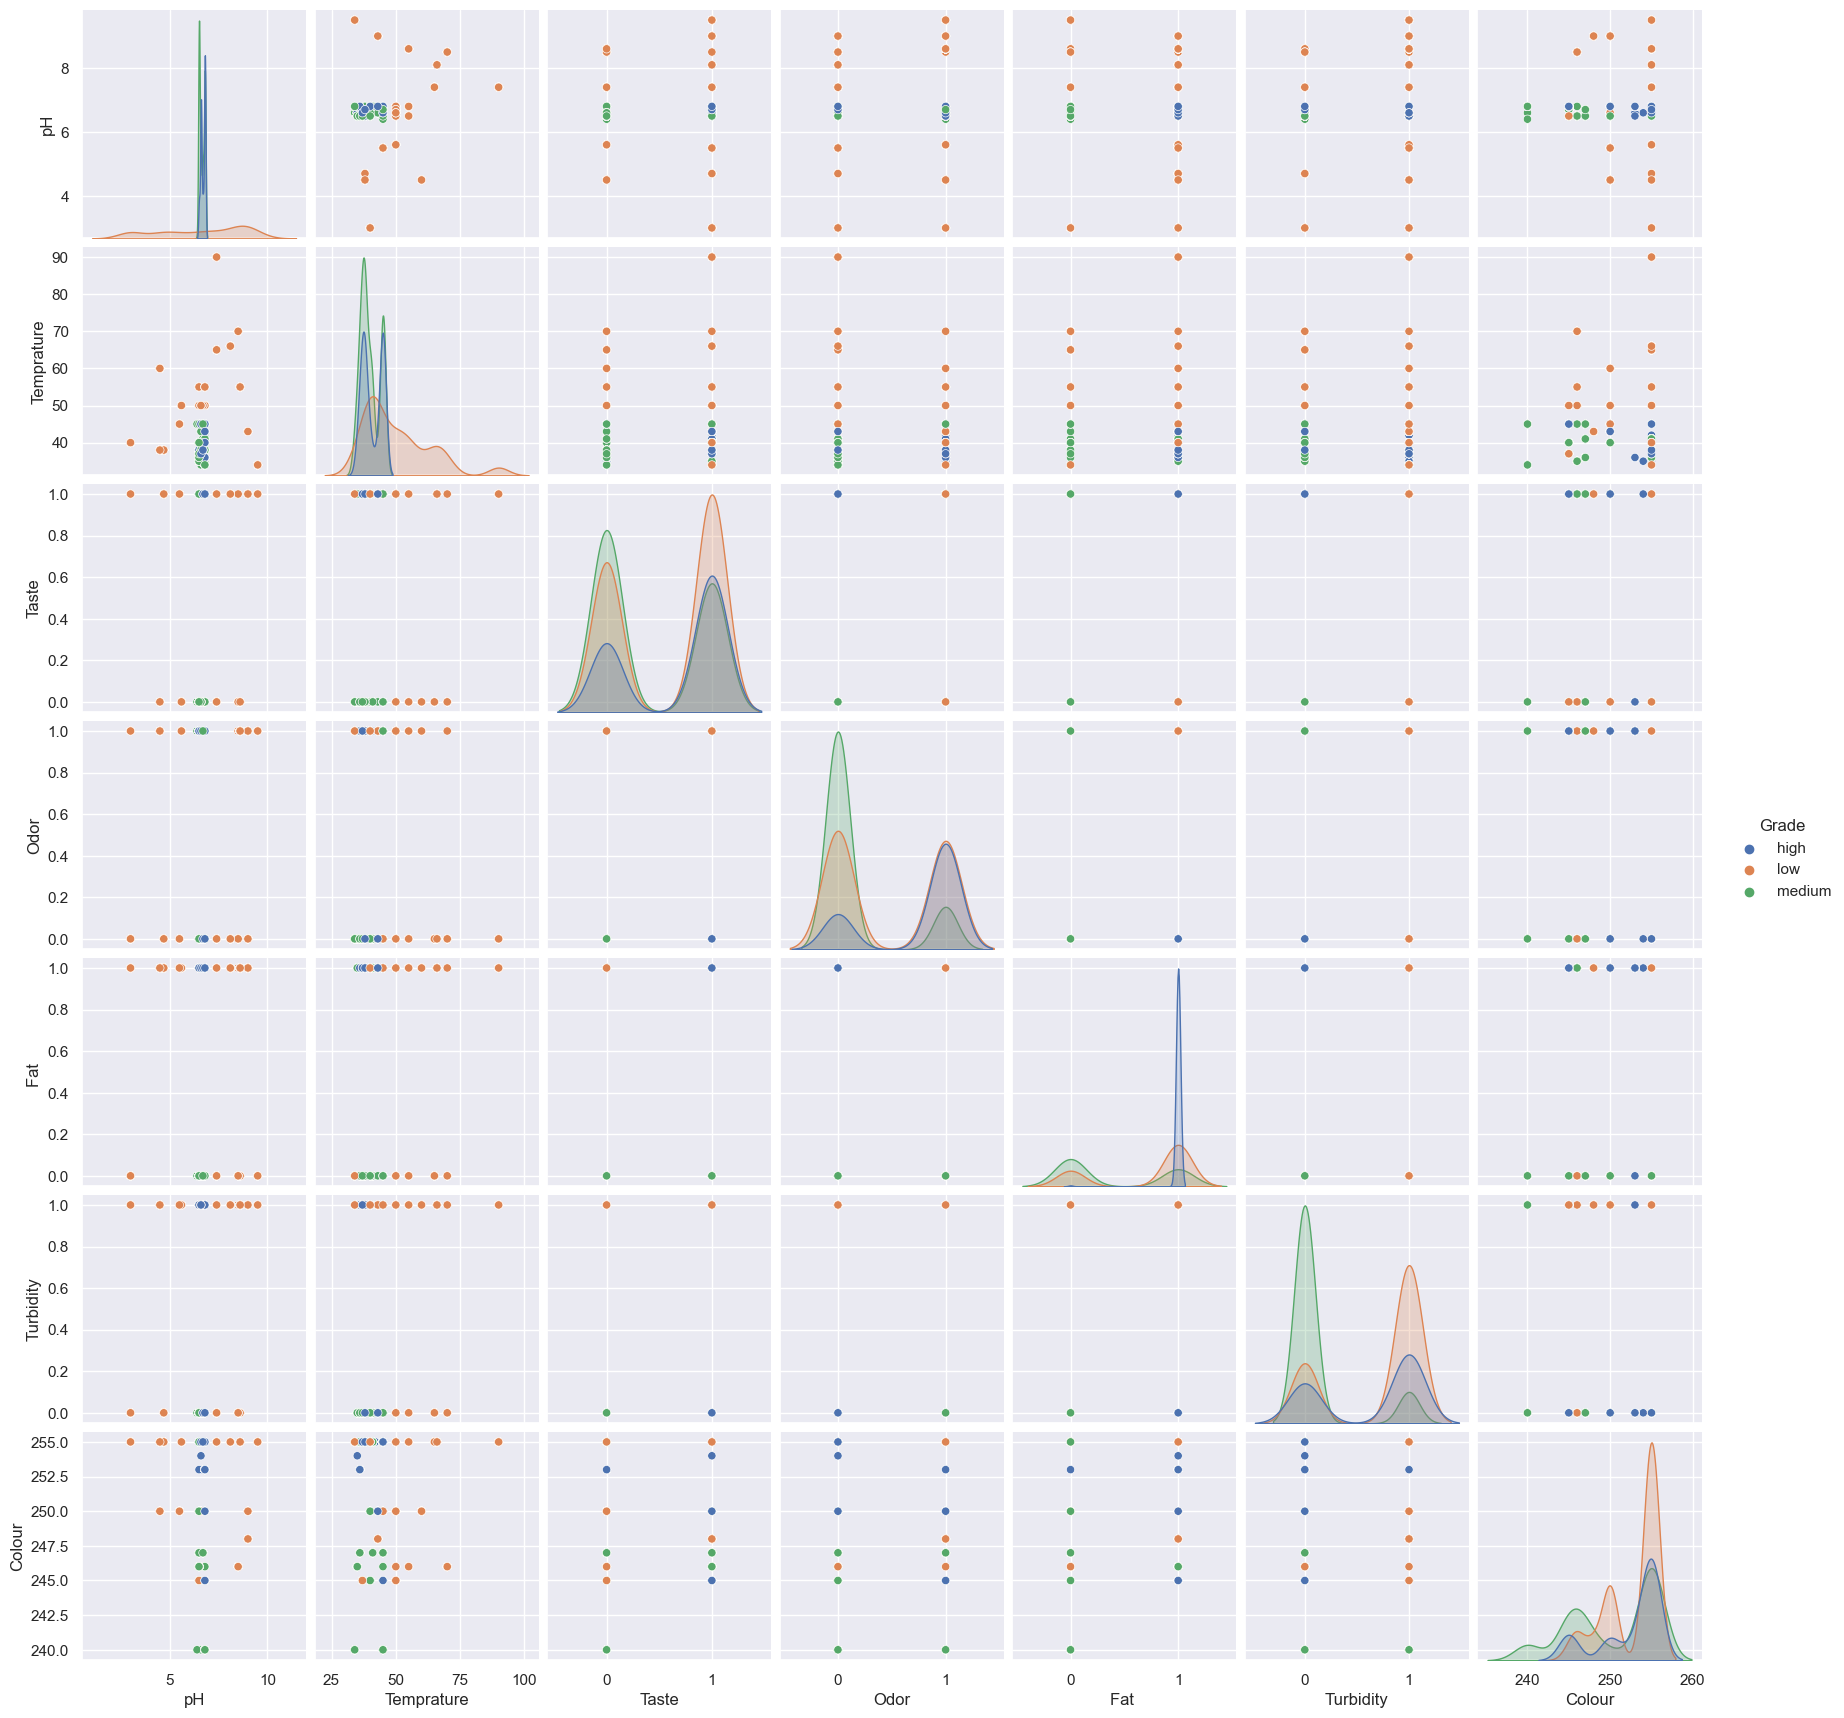

In [15]:
sns.set(style="darkgrid")  
sns.pairplot(df, hue="Grade")  
plt.show()

In [6]:
X = df.iloc[:, :-1]
y = df['Grade']

In [8]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information between features and target variable
mutual_info = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

result_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mutual_info})

result_df = result_df.sort_values(by='Mutual_Information', ascending=False) # Sort features based on mutual information

# Display ranked features
print("Ranked Features based on Mutual Information with Target Variable (Grade):")
print(result_df)


Ranked Features based on Mutual Information with Target Variable (Grade):
      Feature  Mutual_Information
0          pH            0.544824
1  Temprature            0.396436
4        Fat             0.200573
6      Colour            0.199712
5   Turbidity            0.144702
3        Odor            0.098316
2       Taste            0.029828


 - The top-ranked features based on mutual information are pH and Temperature, indicating their significant impact on milk quality prediction.
 - Fat and Colour follow closely, also demonstrating considerable relevance to milk quality.
 - Turbidity, Odor, and Taste exhibit lower mutual information scores compared to other features, suggesting relatively weaker associations with milk quality.

Population per class:           0
high    256
low     429
medium  374

1.25 * Proportion Chance Criterion: 43.408336833169706%


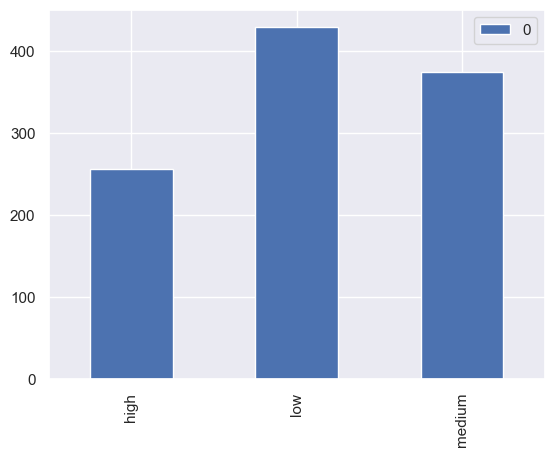

In [16]:
from collections import Counter

state_counts = Counter(df['Grade'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

# Calculate PCC
num=(df_state[0]/df_state[0].sum())**2
print("Population per class: {}\n".format(df_state))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

If the accuracy of the kNN model on the test data exceeds approximately 43.41%, it would be considered successful according to the 1.25 * PCC rule of thumb.

##  Three Highlights of the Results

- **The top-ranked features based on mutual information are pH and Temperature**
- **The calculated 1.25*Proportion Chance Criterion (PCC) is approximately 43.41%.**
- **k=5 was chosen as the optimal number of neighbors, with an accuracy of 98.74%**

##  k_NN implementation

Import the necessary libraries

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Data Preparation and Cleaning

Checking for null values:

In [11]:
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

Note: the dataset is already an integer or float value, one hot encoding is unnecessary

Then we procede to find the dependent and independent variables.
Dependent variable is Grade and the rest are independent variables

In [12]:
X = df.iloc[:, :-1]
y = df['Grade']

We need to find the optimal number of neighbors

In [13]:
train_score = []
test_score = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for j in range(1, 31):
  knn = KNeighborsClassifier(n_neighbors=j)
  knn.fit(X_train, y_train)

  train_score.append(knn.score(X_train, y_train))

  test_score.append(knn.score(X_test, y_test))

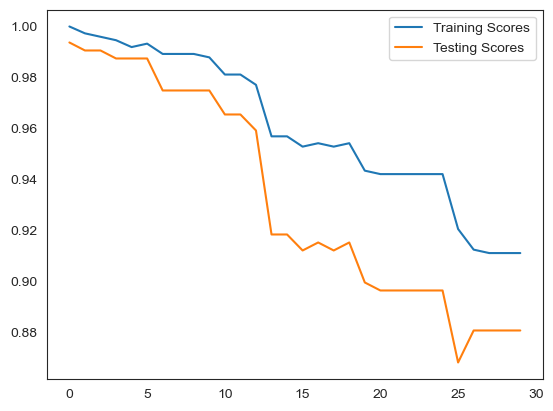

In [14]:
plt.plot(train_score, label="Training Scores")
plt.plot(test_score, label="Testing Scores")
plt.legend()
plt.show()

The result we got showed the optimal number of neighbors started from 1 to 5.
We can see the consistent result where both the accuracies have at least 90% accuracy which is what we needed.
The rest of the neighbors like 6 and more can be described as underfit due to test score has a bigger gap between accuracies.

Now we know the optimal number of neighbors, we can start building the model

In [15]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

Model Evaluation

In [16]:
clf_pred = clf.predict(X_test)

In [17]:
print('Accuracy Score:' + str(accuracy_score(y_test, clf_pred)))
print()
print('Classification Report:')
print(classification_report(y_test, clf_pred))

Accuracy Score:0.9874213836477987

Classification Report:
              precision    recall  f1-score   support

        high       0.97      1.00      0.99        76
         low       1.00      0.98      0.99       115
      medium       0.98      0.98      0.98       127

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



We got 98.74% accuracy which is excellent.
If we look at the precisiion, recall and f1 score. We got the highest score possible.

This means the model is excellent!

To see further how accurate our model really is, we tried confusion matrix.
The confusion matrix displayed only 4 inaccurate predictions. This clearly indicates how excellent the performance of our model.

In [18]:
confusion_matrix(y_test, clf_pred)

array([[ 76,   0,   0],
       [  0, 113,   2],
       [  2,   0, 125]], dtype=int64)

##  Discussion of Results

Discussion of the results from the k-Nearest Neighbors (kNN) implementation on the milk quality prediction dataset:

**Determining Optimal Value of k (Number of Neighbors):** The analysis started by finding the optimal value of k, which represents the number of neighbors to consider for the kNN algorithm. This was done by training the model with different values of k ranging from 1 to 30 and evaluating the training and testing scores for each value of k.


The plots of training and testing scores against different values of k showed that the optimal range of k was between 1 and 5. Within this range, both the training and testing scores remained consistent, with an accuracy of at least 90%. Beyond k=6, the model started to underfit, as indicated by a larger gap between the training and testing scores, suggesting that higher values of k were not suitable for this dataset.


Model Training and Evaluation: Based on the analysis, the value of k=5 was chosen as the optimal number of neighbors for the kNN model. The model was then trained on the training data using this value of k.


**The performance of the trained model was evaluated on the test data, and the results were highly promising:**

**Accuracy Score:** The model achieved an outstanding accuracy score of 98.74% on the test data, indicating that it correctly classified nearly 99% of the milk samples into their respective quality categories (low, medium, or high).

**Classification Report:** The classification report provided detailed metrics for each class, including precision, recall, and F1-score. All three classes (low, medium, and high milk quality) exhibited high values for these metrics, further reinforcing the model's excellent performance.

 - For the "high" quality class, the precision was 0.97, the recall was 1.00, and the F1-score was 0.99.

 - For the "low" quality class, the precision was 1.00, the recall was 0.98, and the F1-score was 0.99.

 - For the "medium" quality class, the precision was 0.98, the recall was 0.98, and the F1-score was 0.98.

**These scores indicate that the model had a high true positive rate (recall) and a low false positive rate (precision) for all three classes, resulting in an overall accurate and reliable classification.**

**Confusion Matrix:** The confusion matrix provided a visual representation of the model's misclassifications. Out of the 318 test samples, the model misclassified only 4 instances, further confirming its exceptional performance. The confusion matrix showed that:

 - For the "high" quality class, all 76 instances were correctly classified.

 - For the "low" quality class, 113 out of 115 instances were correctly classified, with 2 instances misclassified as "medium."

 - For the "medium" quality class, 125 out of 127 instances were correctly classified, with 2 instances misclassified as "low."

**Proportion Chance Criteria**: 
 - Model Accuracy: 98.74%
 - 1.25 * PCC: 43.41% 

With an accuracy of nearly 98.74%, the KNN model's performance greatly surpasses the benchmark set by the PCC, demonstrating its effectiveness in classifying milk quality grades.

**Overall, the kNN model with k=5 demonstrated outstanding performance in predicting milk quality based on the given dataset. The high accuracy score, along with the excellent precision, recall, and F1-scores for all three classes, indicate that the model can effectively classify milk samples into low, medium, and high-quality categories with a high degree of reliability. The confusion matrix analysis further solidified the model's robustness, with minimal misclassifications.**